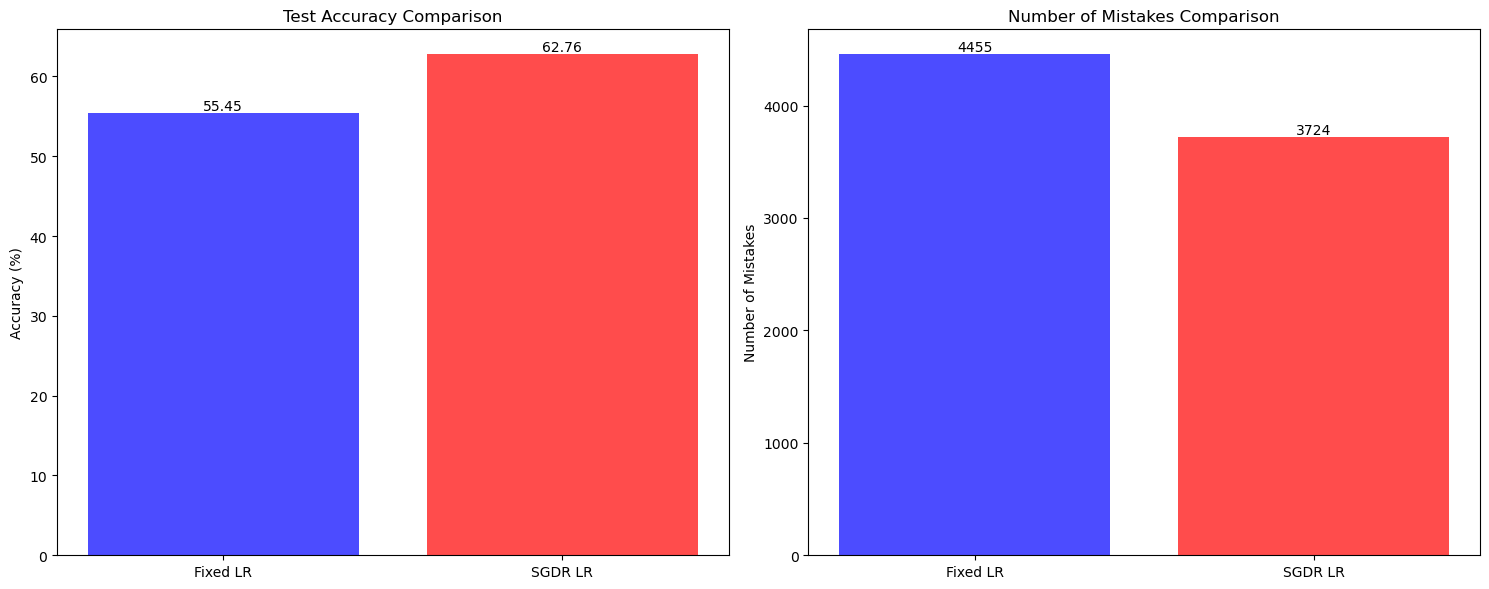

Comparison:
test_accuracy:
  Fixed LR: 55.45
  SGDR LR: 62.76
  Difference (SGDR - Fixed): 7.31
  Percentage Improvement: 13.18%

num_mistakes:
  Fixed LR: 4455.00
  SGDR LR: 3724.00
  Difference (SGDR - Fixed): -731.00
  Percentage Reduction: 16.41%



In [2]:
import json
import matplotlib.pyplot as plt

# Load the JSON files
with open('fixed_lr.json', 'r') as f:
    fixed_lr_data = json.load(f)

with open('sgdr_lr.json', 'r') as f:
    sgdr_lr_data = json.load(f)

# Extract relevant metrics
metrics = ['test_accuracy', 'num_mistakes']

# Create separate plots for each metric
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy plot
ax1.bar(['Fixed LR', 'SGDR LR'], [fixed_lr_data['test_accuracy'], sgdr_lr_data['test_accuracy']], color=['blue', 'red'], alpha=0.7)
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Test Accuracy Comparison')
for i, v in enumerate([fixed_lr_data['test_accuracy'], sgdr_lr_data['test_accuracy']]):
    ax1.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Number of mistakes plot
ax2.bar(['Fixed LR', 'SGDR LR'], [fixed_lr_data['num_mistakes'], sgdr_lr_data['num_mistakes']], color=['blue', 'red'], alpha=0.7)
ax2.set_ylabel('Number of Mistakes')
ax2.set_title('Number of Mistakes Comparison')
for i, v in enumerate([fixed_lr_data['num_mistakes'], sgdr_lr_data['num_mistakes']]):
    ax2.text(i, v, f'{v}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print comparison
print("Comparison:")
for metric in metrics:
    fixed_value = fixed_lr_data[metric]
    sgdr_value = sgdr_lr_data[metric]
    difference = sgdr_value - fixed_value
    print(f"{metric}:")
    print(f"  Fixed LR: {fixed_value:.2f}")
    print(f"  SGDR LR: {sgdr_value:.2f}")
    print(f"  Difference (SGDR - Fixed): {difference:.2f}")
    if metric == 'test_accuracy':
        print(f"  Percentage Improvement: {(difference / fixed_value * 100):.2f}%")
    else:  # for num_mistakes, lower is better
        print(f"  Percentage Reduction: {(-difference / fixed_value * 100):.2f}%")
    print()